In [ ]:
#pip install movecolumn
#%pip install umap-learn

In [279]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import movecolumn as mc
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [134]:
schema_df = pd.read_csv('1688641626_data_dictionary.csv',index_col='Variable')
df = pd.read_csv('rolling_stones_spotify.csv')

**EDA**


In [135]:
schema_df

,Description
Variable,
name,the name of the song
album,the name of the album
release_date,the day month and year the album was released
track number,the order the song appears on the album
id,the Spotify id for the song
uri,the Spotify uri for the song
acousticness,A confidence measure from 0.0 to 1.0 of whethe...
danceability,Danceability describes how suitable a track is...
energy,Energy is a measure from 0.0 to 1.0 and repres...


In [136]:
df

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.9320,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.9610,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.9560,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.8950,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.9660,-5.098,0.0930,130.533,0.2060,32,305106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,1605,Carol,The Rolling Stones,1964-04-16,8,08l7M5UpRnffGl0FyuRiQZ,spotify:track:08l7M5UpRnffGl0FyuRiQZ,0.1570,0.466,0.932,0.006170,0.3240,-9.214,0.0429,177.340,0.9670,39,154080
1606,1606,Tell Me,The Rolling Stones,1964-04-16,9,3JZllQBsTM6WwoJdzFDLhx,spotify:track:3JZllQBsTM6WwoJdzFDLhx,0.0576,0.509,0.706,0.000002,0.5160,-9.427,0.0843,122.015,0.4460,36,245266
1607,1607,Can I Get A Witness,The Rolling Stones,1964-04-16,10,0t2qvfSBQ3Y08lzRRoVTdb,spotify:track:0t2qvfSBQ3Y08lzRRoVTdb,0.3710,0.790,0.774,0.000000,0.0669,-7.961,0.0720,97.035,0.8350,30,176080
1608,1608,You Can Make It If You Try,The Rolling Stones,1964-04-16,11,5ivIs5vwSj0RChOIvlY3On,spotify:track:5ivIs5vwSj0RChOIvlY3On,0.2170,0.700,0.546,0.000070,0.1660,-9.567,0.0622,102.634,0.5320,27,121680


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int64  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   release_date      1610 non-null   object 
 4   track_number      1610 non-null   int64  
 5   id                1610 non-null   object 
 6   uri               1610 non-null   object 
 7   acousticness      1610 non-null   float64
 8   danceability      1610 non-null   float64
 9   energy            1610 non-null   float64
 10  instrumentalness  1610 non-null   float64
 11  liveness          1610 non-null   float64
 12  loudness          1610 non-null   float64
 13  speechiness       1610 non-null   float64
 14  tempo             1610 non-null   float64
 15  valence           1610 non-null   float64
 16  popularity        1610 non-null   int64  


In [138]:
df.isnull().sum()

Unnamed: 0          0
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [139]:
df.duplicated().sum()

0

In [140]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [141]:
df.shape

(1610, 17)

In [142]:
df.columns

Index(['name', 'album', 'release_date', 'track_number', 'id', 'uri',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms'],
      dtype='object')

In [143]:
df['release_date'] = pd.to_datetime(df['release_date'] , format= 'mixed')

In [144]:
df.dtypes

name                        object
album                       object
release_date        datetime64[ns]
track_number                 int64
id                          object
uri                         object
acousticness               float64
danceability               float64
energy                     float64
instrumentalness           float64
liveness                   float64
loudness                   float64
speechiness                float64
tempo                      float64
valence                    float64
popularity                   int64
duration_ms                  int64
dtype: object

In [145]:
df.release_date

0      2022-06-10
1      2022-06-10
2      2022-06-10
3      2022-06-10
4      2022-06-10
          ...    
1605   1964-04-16
1606   1964-04-16
1607   1964-04-16
1608   1964-04-16
1609   1964-04-16
Name: release_date, Length: 1610, dtype: datetime64[ns]

In [146]:
df_num = df.select_dtypes(exclude = ['object','string'])

In [149]:
schema_df

,Description
Variable,
name,the name of the song
album,the name of the album
release_date,the day month and year the album was released
track number,the order the song appears on the album
id,the Spotify id for the song
uri,the Spotify uri for the song
acousticness,A confidence measure from 0.0 to 1.0 of whethe...
danceability,Danceability describes how suitable a track is...
energy,Energy is a measure from 0.0 to 1.0 and repres...


In [150]:
schema_df.loc['acousticness','Description']

'A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.'

In [151]:
schema_df.loc['valence','Description']

'A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).'

In [152]:
schema_df.loc['liveness','Description']

'Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.'

In [153]:
schema_df.loc['energy','Description']

'Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.'

In [154]:
schema_df.loc['speechiness','Description']

'detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.'

In [155]:
schema_df.loc['instrumentalness','Description']

'Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.'

In [217]:
schema_df.loc['loudness','Description']

'The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.'

In [319]:
df.track_number.isnull().sum()

0

In [156]:
corr_metrics = df_num.corr()
corr_metrics.style.background_gradient()

,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
release_date,1.000000,0.361953,-0.162174,-0.355209,0.404734,-0.062523,0.518999,0.398623,0.307471,0.031198,-0.301330,-0.082033,0.299617
track_number,0.361953,1.000000,-0.035675,-0.112004,0.096314,-0.002772,0.188351,0.100835,0.040617,-0.023934,-0.104567,-0.145115,0.156455
acousticness,-0.162174,-0.035675,1.000000,0.070017,-0.363819,0.061403,-0.117739,-0.237083,-0.021774,-0.171003,-0.138803,0.108046,0.039128
danceability,-0.355209,-0.112004,0.070017,1.000000,-0.300536,-0.031812,-0.516387,-0.249406,-0.322684,-0.324398,0.546210,0.141205,-0.220045
energy,0.404734,0.096314,-0.363819,-0.300536,1.000000,0.120261,0.511188,0.698039,0.417214,0.201885,0.046217,-0.057272,0.148876
instrumentalness,-0.062523,-0.002772,0.061403,-0.031812,0.120261,1.000000,0.008873,0.012524,0.009586,0.010961,0.103480,-0.010612,-0.137599
liveness,0.518999,0.188351,-0.117739,-0.516387,0.511188,0.008873,1.000000,0.327036,0.400018,0.108855,-0.347451,-0.205845,0.304735
loudness,0.398623,0.100835,-0.237083,-0.249406,0.698039,0.012524,0.327036,1.000000,0.189904,0.112837,-0.027571,0.156323,0.221558
speechiness,0.307471,0.040617,-0.021774,-0.322684,0.417214,0.009586,0.400018,0.189904,1.000000,0.192687,-0.399751,-0.136745,0.114546
tempo,0.031198,-0.023934,-0.171003,-0.324398,0.201885,0.010961,0.108855,0.112837,0.192687,1.000000,0.000558,-0.061061,0.001465


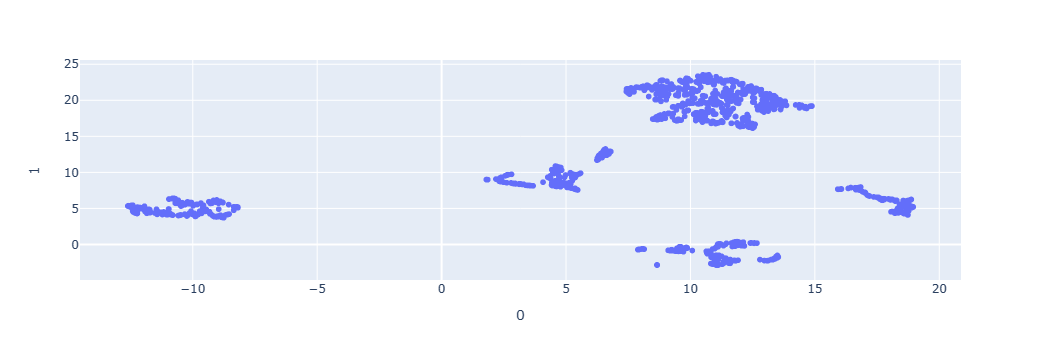

In [312]:
from umap import UMAP
features = df[['popularity','track_number']]
umap_2d = UMAP(n_components=2 , init = 'random' , random_state=0)
umap_3d = UMAP(n_components=3 , init = 'random' , random_state=0)

proj_2d = umap_2d.fit_transform(features)
proj_3d = umap_3d.fit_transform(features)

fig_2d = px.scatter(
    proj_2d, x=0 , y=1
)
fig_3d = px.scatter_3d(
    proj_3d, x=0 , y=1 ,z=2
)
fig_3d.update_traces (marker_size=5)
fig_2d.show()
fig_3d.show()

**I do see clear 5 cluster**

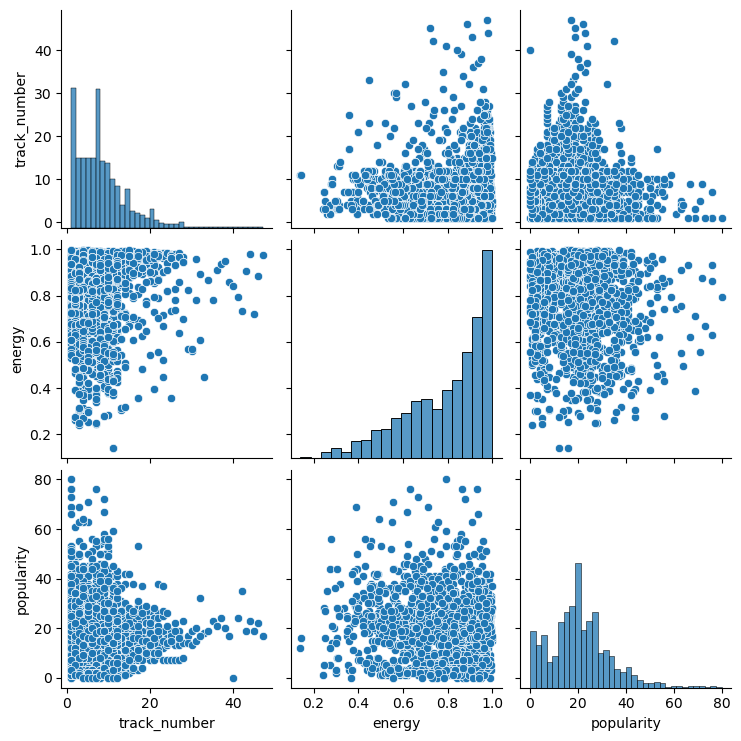

In [322]:
cols = ['track_number','energy','popularity']
sns.pairplot(df,vars=cols)
plt.show()

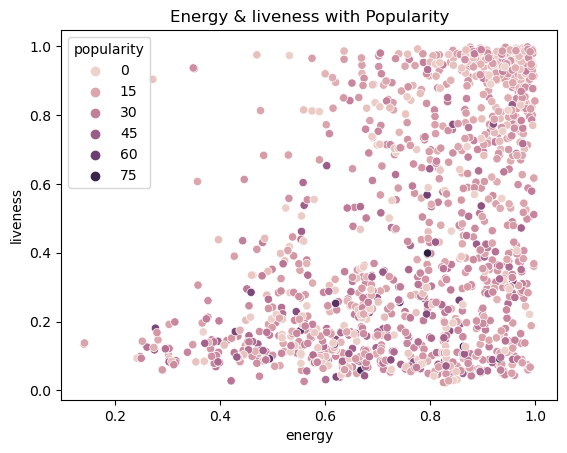

In [226]:
sns.scatterplot(x=df['energy'],y=df['liveness'],hue=df['popularity'])
plt.title('Energy & liveness with Popularity')
plt.show()

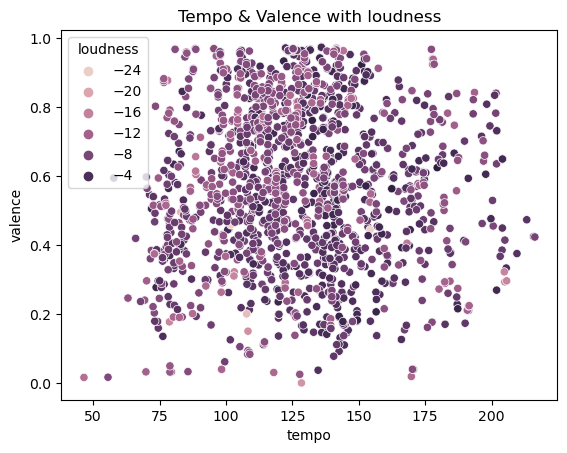

In [227]:
sns.scatterplot(x=df['tempo'],y=df['valence'],hue=df['loudness'])
plt.title('Tempo & Valence with loudness')
plt.show()

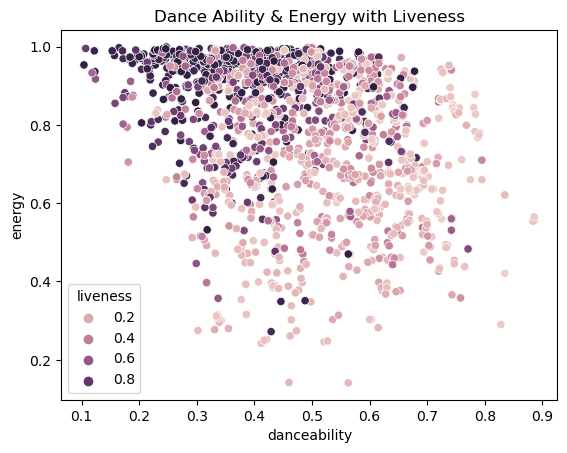

In [231]:
sns.scatterplot(x=df['danceability'],y=df['energy'],hue=df['liveness'])
plt.title('Dance Ability & Energy with Liveness')
plt.show()

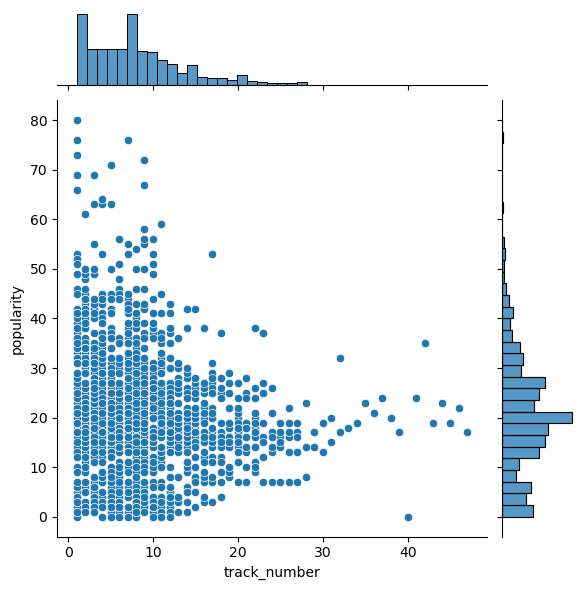

In [230]:
sns.jointplot(x=df['track_number'],y=df['popularity'])
plt.show()

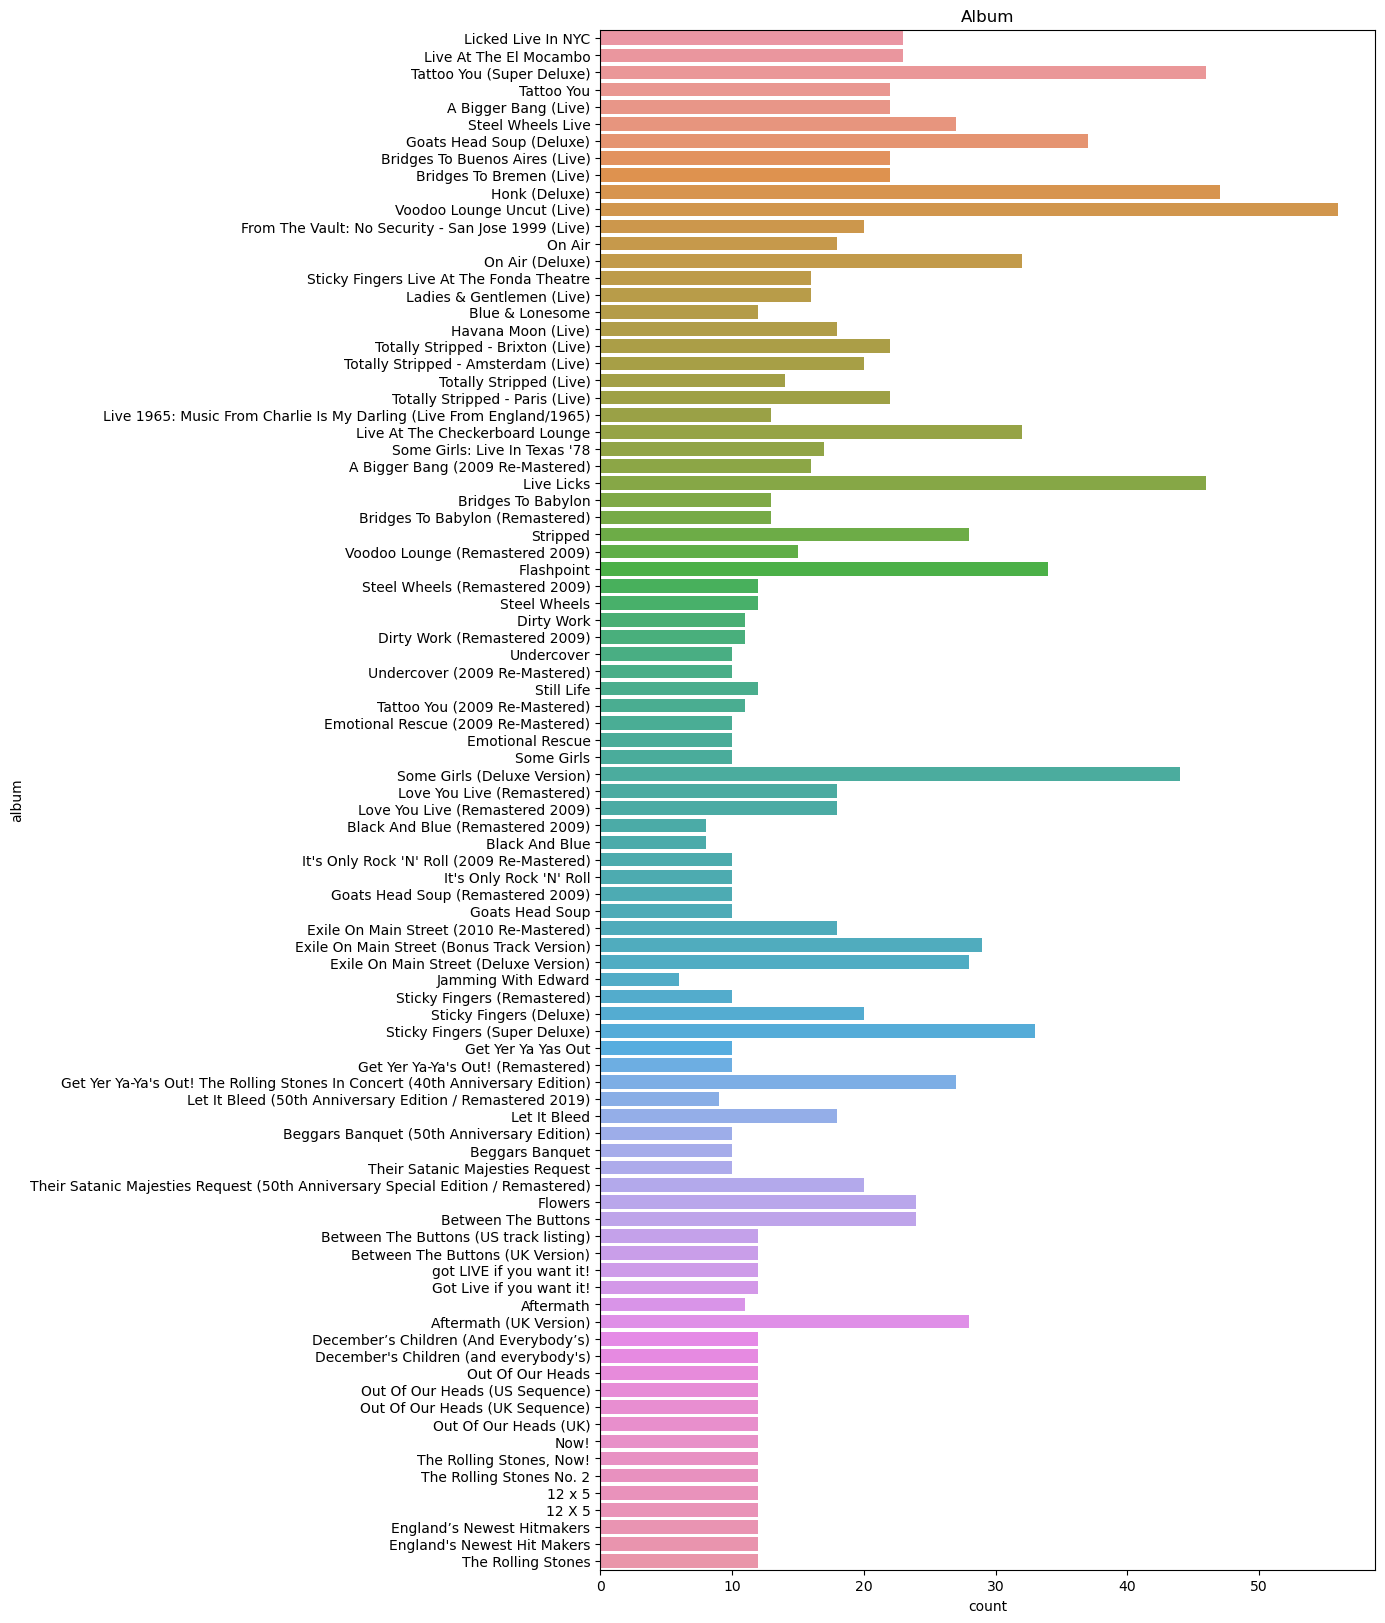

In [232]:
plt.figure(figsize=(10,20))
sns.countplot(y=df['album'])
plt.title('Album')
plt.show()

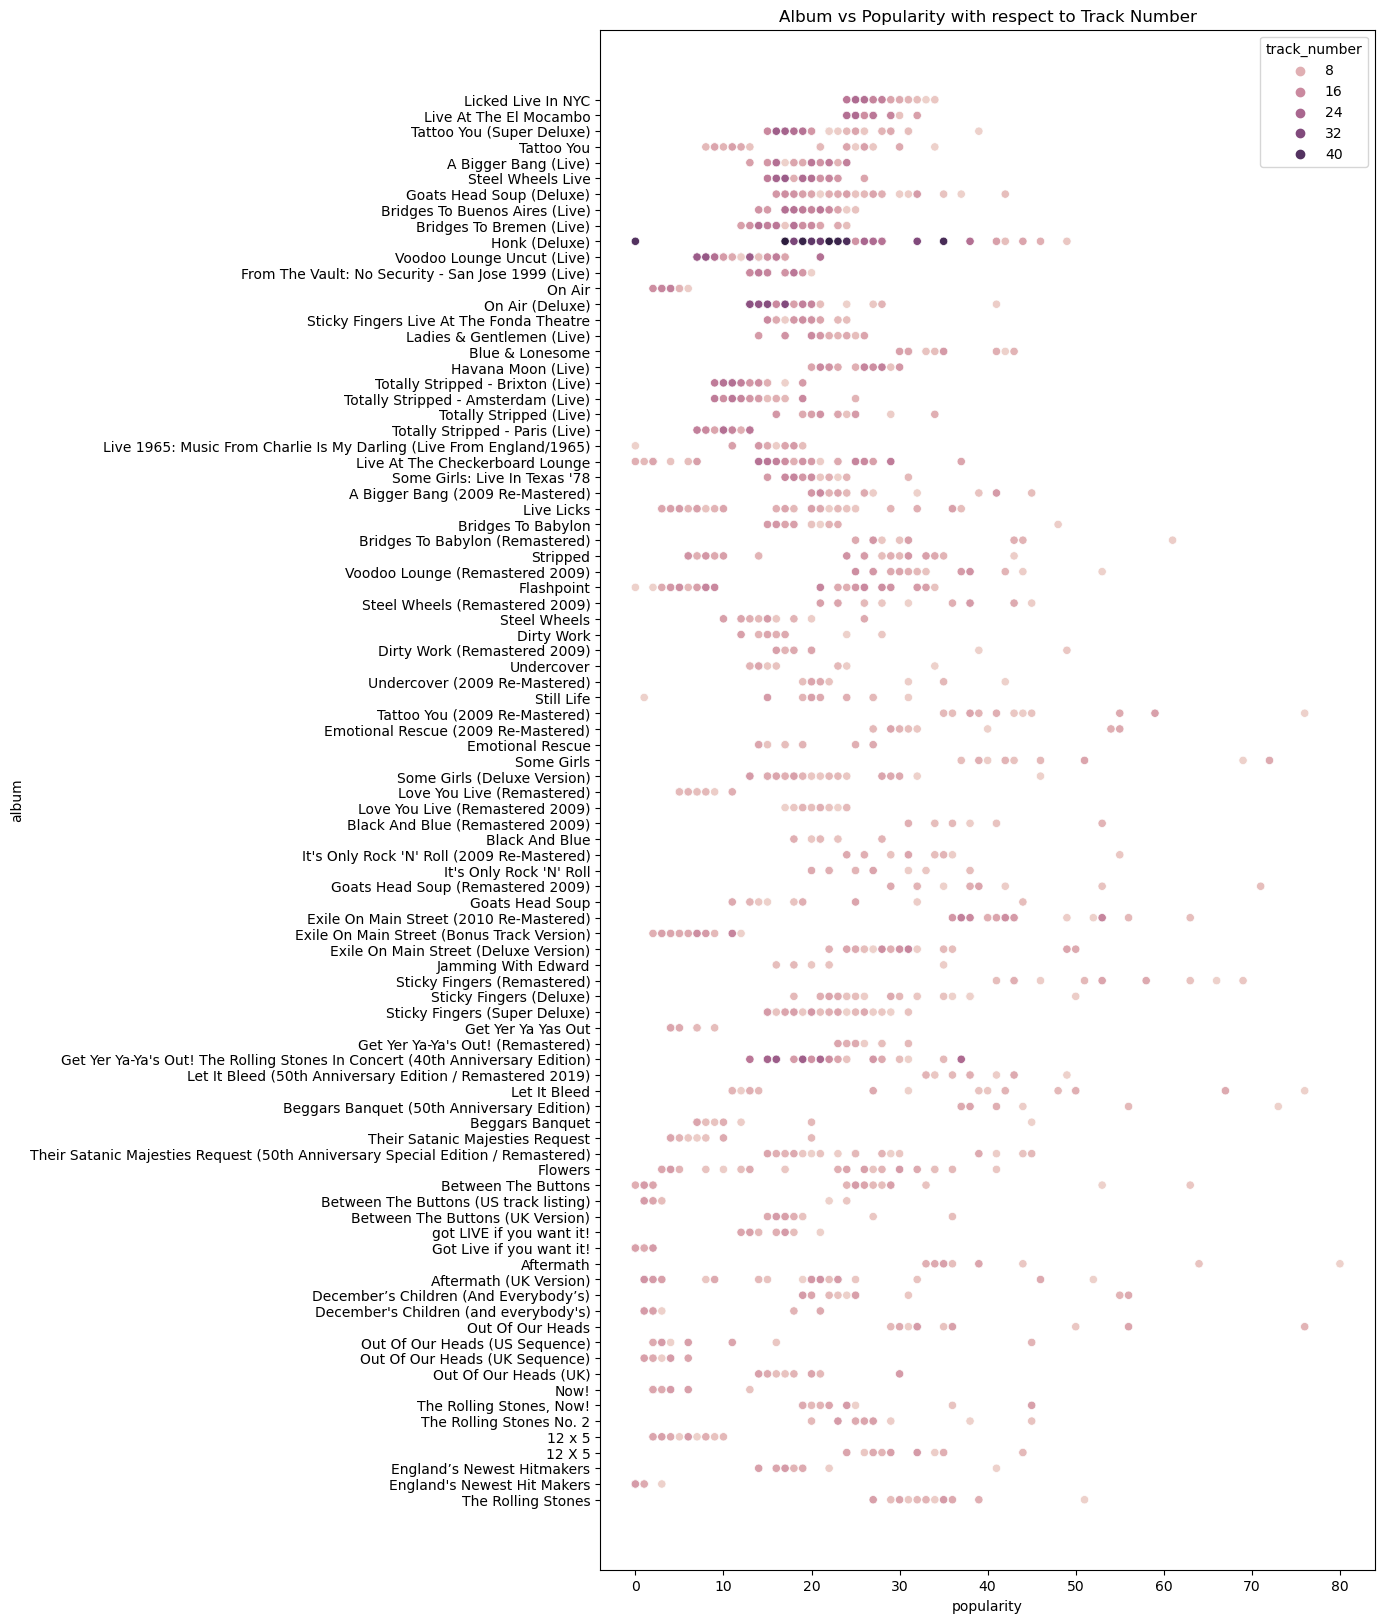

In [233]:
plt.figure(figsize=(10,20))
sns.scatterplot(y=df['album'],x=df['popularity'],hue=df['track_number'])
plt.title('Album vs Popularity with respect to Track Number')
plt.show()

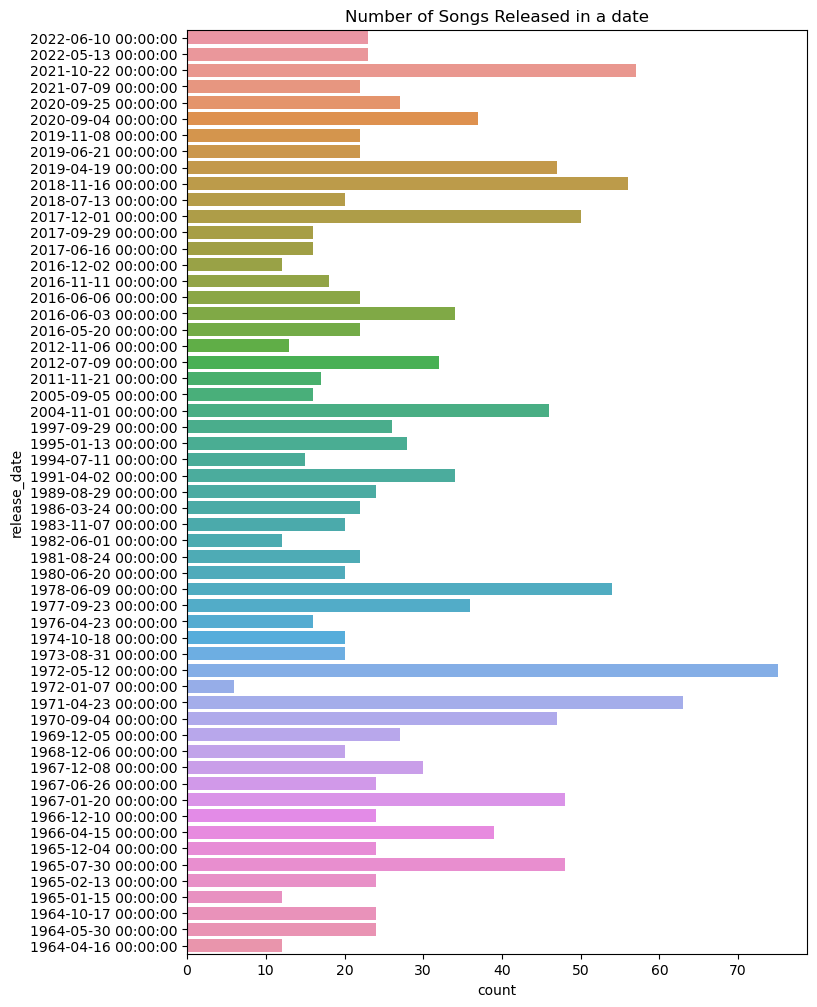

In [234]:
plt.figure(figsize=(8,12))
sns.countplot(y=df['release_date'])
plt.title('Number of Songs Released in a date')
plt.show()

C:\Users\ahmed\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


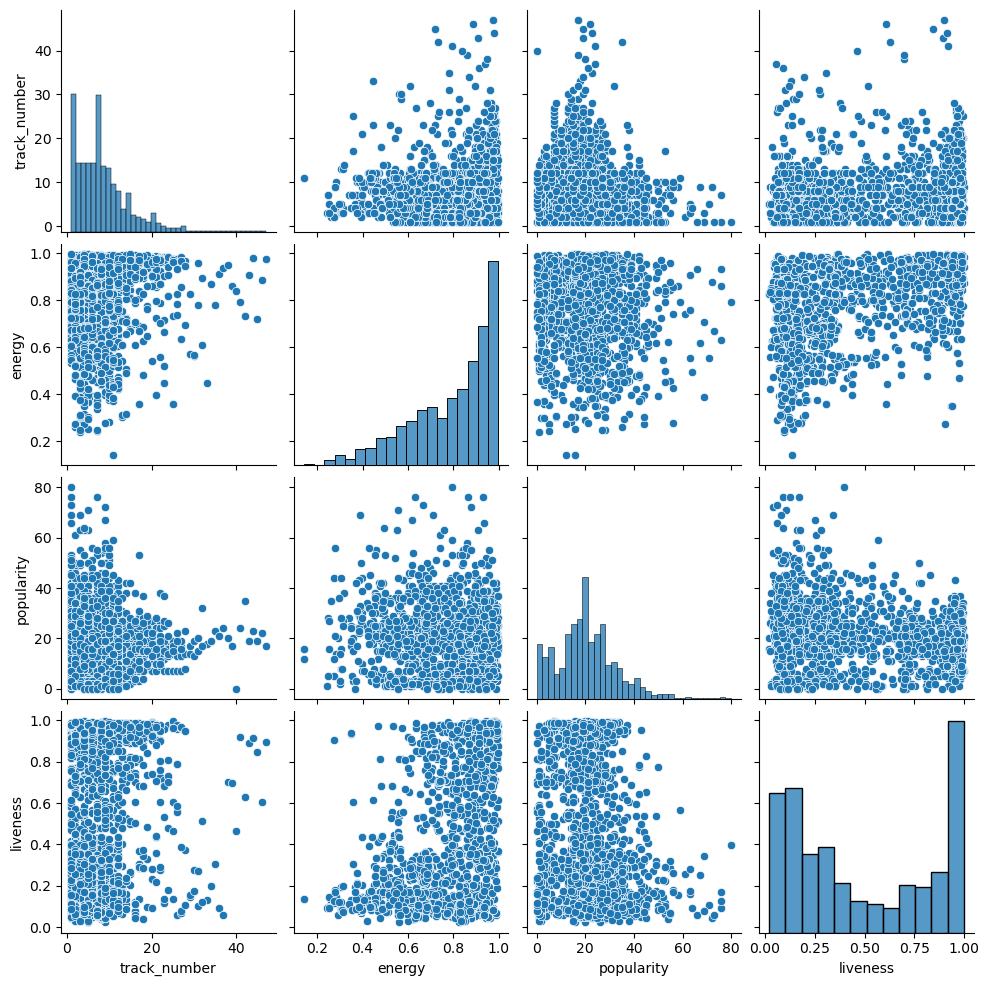

In [236]:
cols = ['track_number','energy','popularity','liveness']
sns.pairplot(df,vars=cols)
plt.show()

C:\Users\ahmed\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


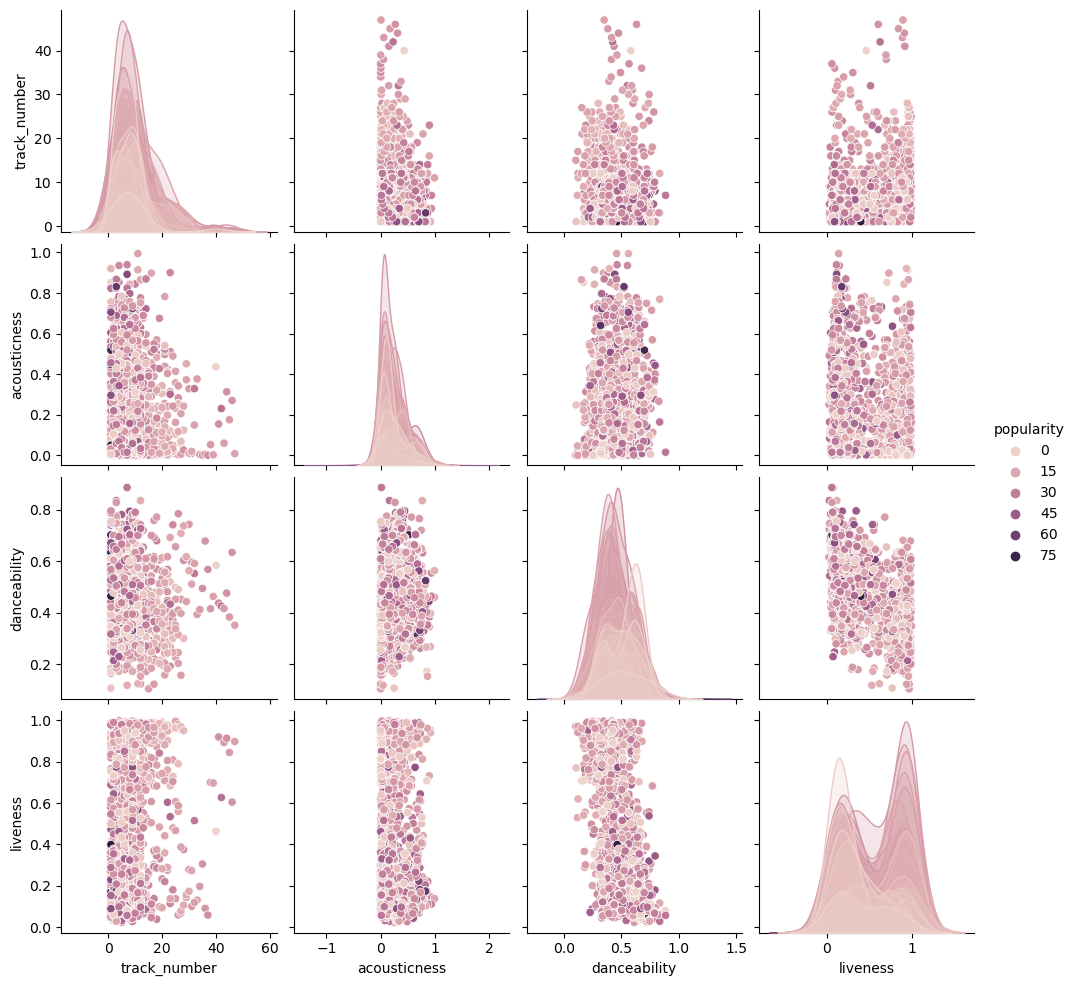

In [237]:
cols = ['track_number','acousticness','danceability','liveness']
sns.pairplot(df,vars=cols,hue='popularity')
plt.show()

**Clustering**

In [238]:
X = df.drop(['name','release_date','id','uri'],axis=1)

In [250]:
mc.MoveToLast(df,'popularity')

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,popularity
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.9320,-12.913,0.1100,118.001,0.0302,48640,33
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.9610,-4.803,0.0759,131.455,0.3180,253173,34
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.9560,-4.936,0.1150,130.066,0.3130,263160,34
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.8950,-5.535,0.1930,132.994,0.1470,305880,32
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.9660,-5.098,0.0930,130.533,0.2060,305106,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,Carol,The Rolling Stones,1964-04-16,8,08l7M5UpRnffGl0FyuRiQZ,spotify:track:08l7M5UpRnffGl0FyuRiQZ,0.1570,0.466,0.932,0.006170,0.3240,-9.214,0.0429,177.340,0.9670,154080,39
1606,Tell Me,The Rolling Stones,1964-04-16,9,3JZllQBsTM6WwoJdzFDLhx,spotify:track:3JZllQBsTM6WwoJdzFDLhx,0.0576,0.509,0.706,0.000002,0.5160,-9.427,0.0843,122.015,0.4460,245266,36
1607,Can I Get A Witness,The Rolling Stones,1964-04-16,10,0t2qvfSBQ3Y08lzRRoVTdb,spotify:track:0t2qvfSBQ3Y08lzRRoVTdb,0.3710,0.790,0.774,0.000000,0.0669,-7.961,0.0720,97.035,0.8350,176080,30
1608,You Can Make It If You Try,The Rolling Stones,1964-04-16,11,5ivIs5vwSj0RChOIvlY3On,spotify:track:5ivIs5vwSj0RChOIvlY3On,0.2170,0.700,0.546,0.000070,0.1660,-9.567,0.0622,102.634,0.5320,121680,27


In [251]:
y = df['popularity']

In [252]:
from sklearn.preprocessing import LabelEncoder

In [253]:
le = LabelEncoder()

In [254]:
X['album'] = le.fit_transform(X['album'])

In [256]:
X.sample(5)

,album,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
319,88,12,0.746,0.295,0.740,0.000341,0.9780,-10.925,0.1010,104.294,0.357,10,347831
1094,28,9,0.636,0.471,0.843,0.040200,0.7730,-5.702,0.0410,156.695,0.632,50,264266
719,72,10,0.646,0.607,0.481,0.001240,0.0856,-9.955,0.0280,94.412,0.546,6,295160
43,50,21,0.497,0.494,0.727,0.000000,0.8940,-7.673,0.0418,126.323,0.729,24,282413
1099,28,14,0.869,0.352,0.656,0.800000,0.2210,-5.721,0.0289,76.121,0.363,30,317173


In [257]:
from sklearn.preprocessing import MinMaxScaler

In [258]:
ms = MinMaxScaler()

In [259]:
cols = X.columns

In [260]:
X = ms.fit_transform(X)

In [261]:
X = pd.DataFrame(X,columns=cols)

In [262]:
X

,album,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0.528090,0.000000,0.082889,0.458493,0.993007,1.000000,0.932384,0.491365,0.144474,0.420994,0.031006,0.4125,0.028766
1,0.528090,0.021739,0.439633,0.283525,0.960373,0.233936,0.962094,0.838035,0.087716,0.500239,0.326489,0.4250,0.241629
2,0.528090,0.043478,0.418506,0.360153,0.965035,0.401606,0.956972,0.832350,0.152796,0.492057,0.321355,0.4250,0.252023
3,0.528090,0.065217,0.570419,0.338442,0.983683,0.000107,0.894478,0.806745,0.282623,0.509303,0.150924,0.4000,0.296483
4,0.528090,0.086957,0.402409,0.254151,0.965035,0.056124,0.967216,0.825425,0.116178,0.494808,0.211499,0.4000,0.295677
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,0.853933,0.152174,0.157940,0.462324,0.921911,0.006195,0.309497,0.649483,0.032790,0.770502,0.992813,0.4875,0.138500
1606,0.853933,0.173913,0.057939,0.517241,0.658508,0.000002,0.506198,0.640378,0.101698,0.444637,0.457906,0.4500,0.233400
1607,0.853933,0.195652,0.373234,0.876117,0.737762,0.000000,0.046102,0.703044,0.081225,0.297504,0.857290,0.3750,0.161396
1608,0.853933,0.217391,0.218303,0.761175,0.472028,0.000070,0.147628,0.634393,0.064913,0.330483,0.546201,0.3375,0.104780


In [461]:
from sklearn.metrics import silhouette_score

In [263]:
from sklearn.cluster import KMeans

In [358]:
cs = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)

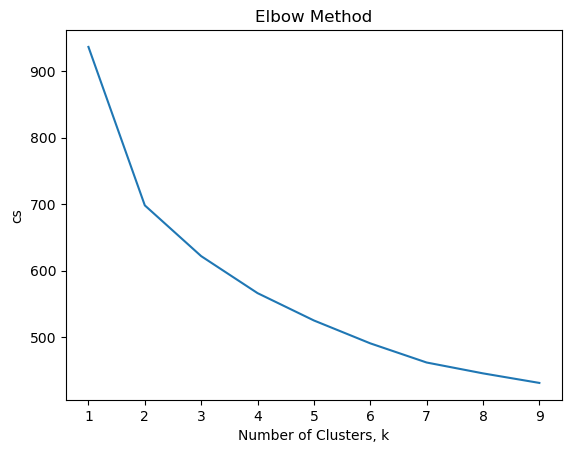

In [359]:
plt.plot(range(1,10),cs)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters, k')
plt.ylabel('cs')
plt.show()

In [498]:
kmeans = KMeans(n_clusters=5,random_state=0)

In [499]:
kmeans.fit(X)

KMeans(n_clusters=5, random_state=0)

In [500]:
silhouette_avg = silhouette_score(X, kmeans.labels_)*100
print("The average Silhouette score is :", silhouette_avg)

The average Silhouette score is : 19.134798626911145


In [487]:
for n_clusters in range(2, 30):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"Silhouette score for {n_clusters} clusters: {silhouette_avg:.2f}")

Silhouette score for 2 clusters: 0.24
Silhouette score for 3 clusters: 0.23
Silhouette score for 4 clusters: 0.19
Silhouette score for 5 clusters: 0.19
Silhouette score for 6 clusters: 0.15
Silhouette score for 7 clusters: 0.16
Silhouette score for 8 clusters: 0.15
Silhouette score for 9 clusters: 0.15
Silhouette score for 10 clusters: 0.15
Silhouette score for 11 clusters: 0.14
Silhouette score for 12 clusters: 0.14
Silhouette score for 13 clusters: 0.14
Silhouette score for 14 clusters: 0.14
Silhouette score for 15 clusters: 0.14
Silhouette score for 16 clusters: 0.13
Silhouette score for 17 clusters: 0.13
Silhouette score for 18 clusters: 0.13
Silhouette score for 19 clusters: 0.14
Silhouette score for 20 clusters: 0.13
Silhouette score for 21 clusters: 0.14
Silhouette score for 22 clusters: 0.13
Silhouette score for 23 clusters: 0.13
Silhouette score for 24 clusters: 0.13
Silhouette score for 25 clusters: 0.13
Silhouette score for 26 clusters: 0.14
Silhouette score for 27 clusters:

In [501]:
correct_labels = sum(y==labels)

In [502]:
print('Results {} out of {} samples were correctly lables'.format(correct_labels,y.size))

Results 63 out of 1610 samples were correctly lables


In [503]:
print('Accuracy Score : {0:0.2f}'.format(correct_labels/float(y.size)*100))

Accuracy Score : 3.91
